In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

0.5638633808516628
0.4361366191483371


[]

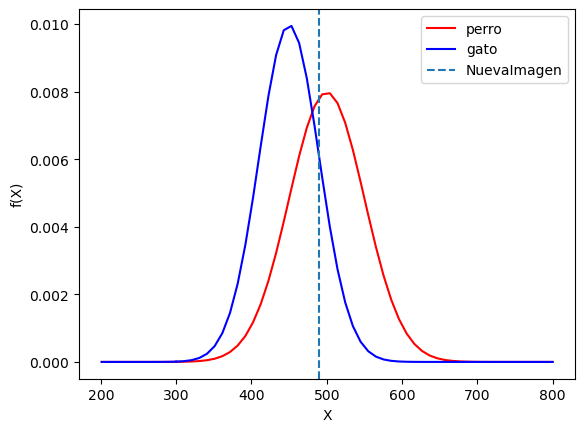

In [10]:
mu1, mu2 = 500, 450
sigma1, sigma2 = 50, 40

perro_marg = 0.5
gato_marg  = 1-perro_marg
perro = norm(mu1, sigma1)
gato  = norm(mu2 ,sigma2)

k = 490

fx = perro_marg*perro.pdf(k) + gato_marg*gato.pdf(k)

p_perro = perro.pdf(k)*perro_marg/fx
p_gato = gato.pdf(k)*gato_marg/fx


print(p_perro)
print(p_gato)

X = np.linspace(min(mu1,mu2) - 3*max(sigma1,sigma2),(max(mu1,mu2) + 6*max(sigma1,sigma2),201))
plt.plot(X, perro.pdf(X), color='r', label='perro')
plt.plot(X, gato.pdf(X), color= 'b', label='gato')
plt.axvline(k, linestyle='--', label='NuevaImagen')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("X")
plt.ylabel("f(X)")
plt.plot()

In [22]:
t.ppf(0.95, df=49)

1.6765508919142629

In [16]:
np.sqrt(50)*1.5

10.606601717798213

In [23]:
(6.5-6)/(1.5/np.sqrt(50))

2.3570226039551585